# Data Visualization for NEXT-White

This notebook is a test of the data loader and vizualization tool to look at the krypton data.

In [1]:
import numpy
from utils.dataloader import dataloader
import pandas as pd

In [2]:
# Load the sipm database:
sipm_db = pd.read_pickle("new_sipm.pkl")

# Create a dataloader:
dl = dataloader(batch_size=1, db=sipm_db)


In [3]:
generator = dl.iterate(1)

In [20]:
batch = next(generator)
batch = next(generator)


[('event', '<i4'), ('peak', 'u1'), ('nsipm', '<i2'), ('ene', '<f4')]
[('event', '<i4'), ('peak', 'u1'), ('nsipm', '<i2'), ('ene', '<f4')]


In [21]:
print(batch.keys())

dict_keys(['energy_deposits', 'S1Pmt', 'S2Si', 'S2Pmt'])


The data loader will yield the S1 values, and S2 will be "dense" images embedded into the full waveform of 550 ticks:

In [22]:
print(batch['S2Pmt'].shape)

(1, 12, 550)


In [23]:
print(batch['S2Si'].shape)

(1, 47, 47, 550)


Plot the waveforms of each PMT and the total S2 PMT waveform:

In [24]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

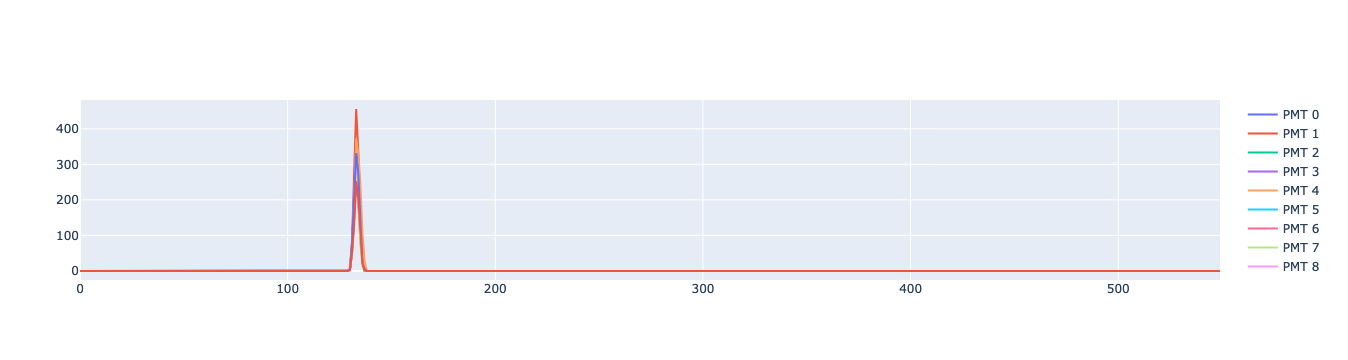

In [25]:

# Create a list of graph objects:
gos = [
    go.Line(x=numpy.arange(550), y=batch['S2Pmt'][0,i_pmt,:], name=f"PMT {i_pmt}")
    for i_pmt in range(12)
]

fig = go.Figure(
    data=gos,
)
fig.show()


(550,)


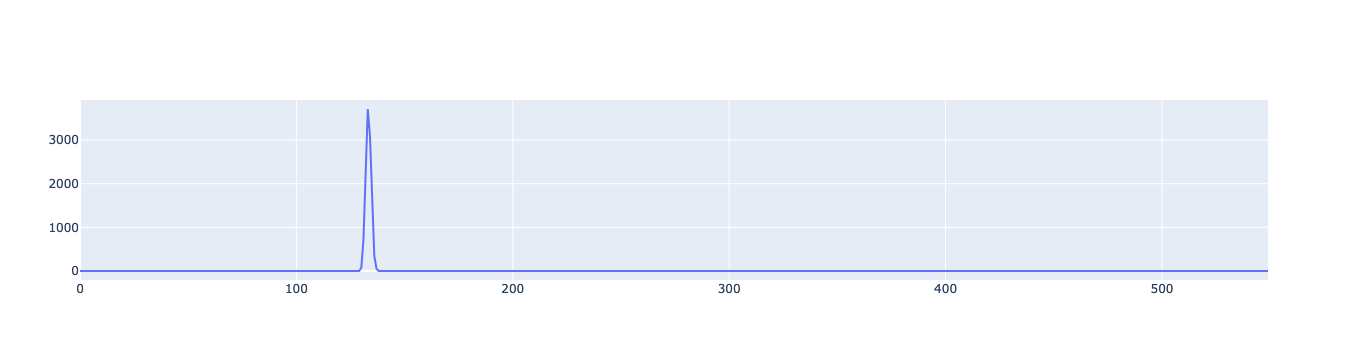

In [26]:
# Just one graph object for the full PMT:

full_pmt_waveform = numpy.sum(batch['S2Pmt'][0], axis=0)
print(full_pmt_waveform.shape)

fig = go.Figure(
    data=go.Line(x=numpy.arange(550), y=full_pmt_waveform, name="Total S2 PMT")
)
fig.show()

Now let's plot the full 3D SIPM response, as well as reduction over all sipms compared to the PMT signals:

In [27]:
image3d = batch['S2Si'][0]
print(image3d.shape)

(47, 47, 550)


In [28]:
x,y,z = numpy.where(image3d != 0)
values = image3d[x,y,z]

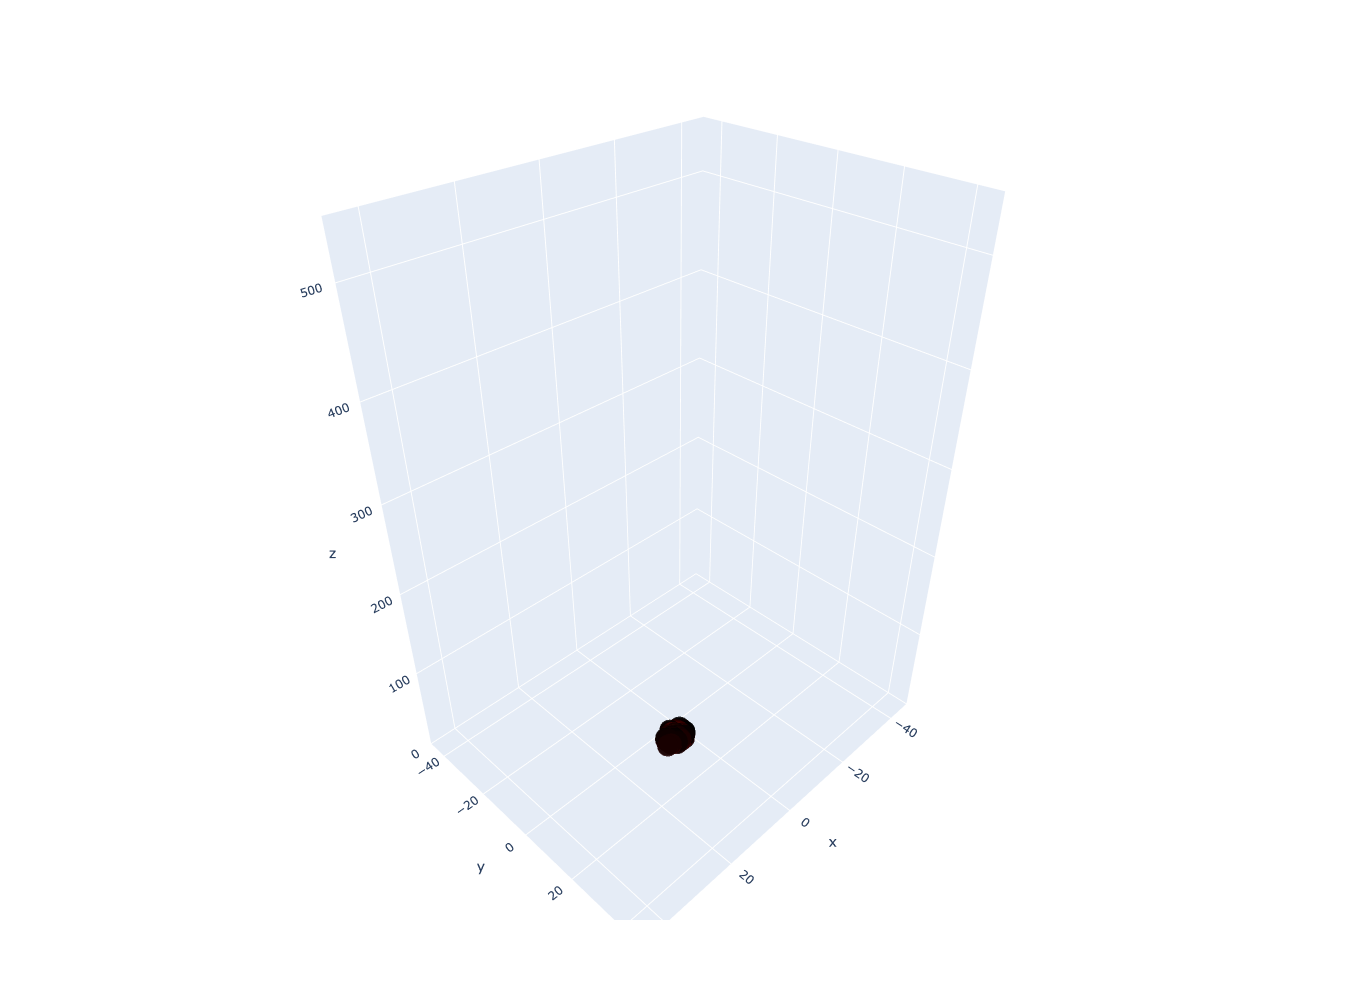

In [32]:
fig = go.Figure(
    
    data = [
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=12,
                color=values,
                colorscale='Hot',
                opacity=0.8
            )
        )
    ]
)

fig.update_layout(
    scene = dict(
        xaxis = dict(range=[-47,47]),
        yaxis = dict(range=[-47,47]),
        zaxis = dict(range=[0,550]),
    ),
    height=1000,
)

fig.show()

Reduce the SIPM data to one axis each and plot this:

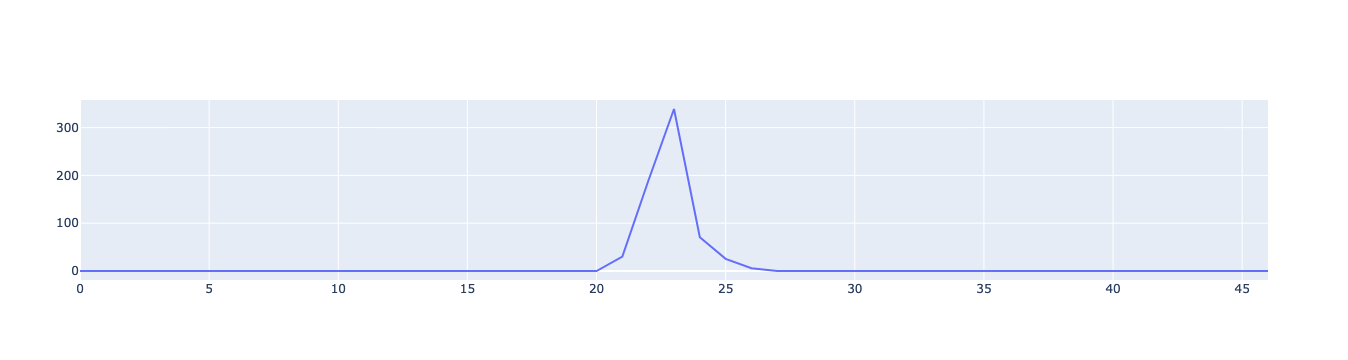

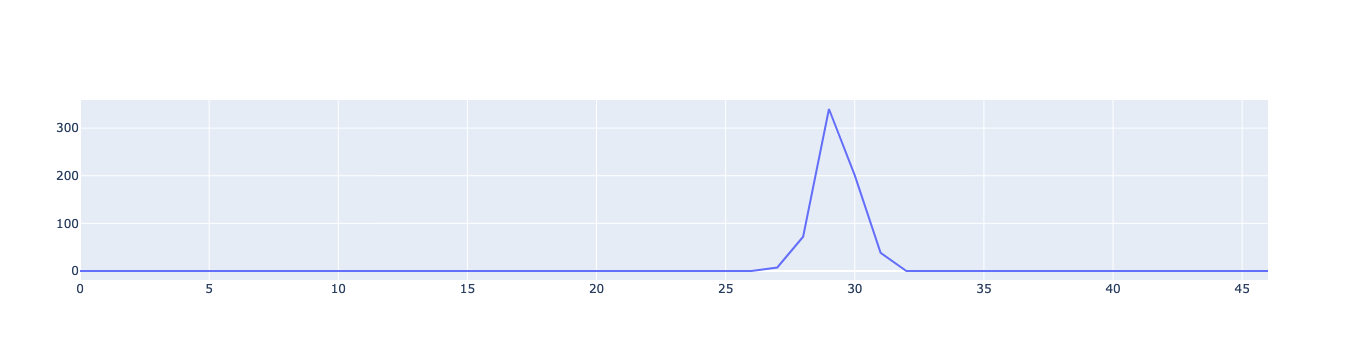

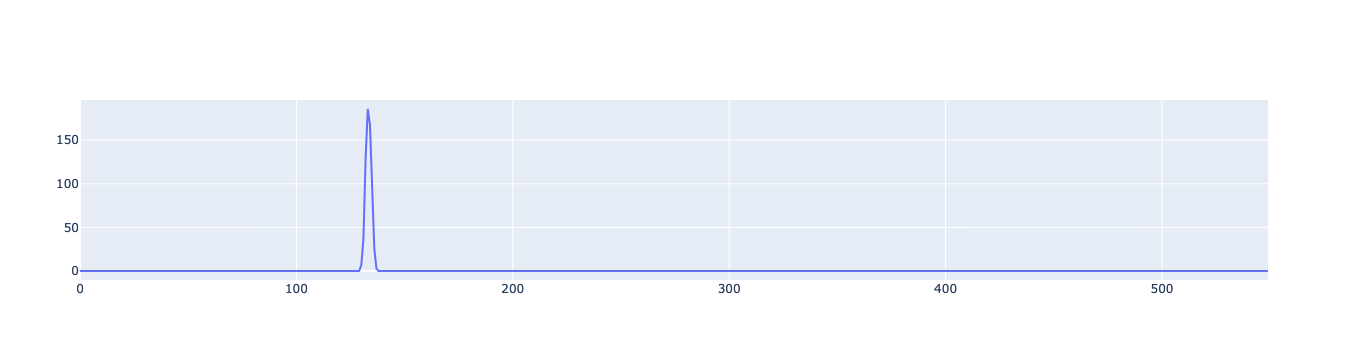

In [33]:
for label, axis in ( (0, (1,2)), (1, (0,2)), (2, (0,1)) ):
    reduce_sipm = numpy.sum(batch['S2Si'][0],axis=axis)
    
    x = reduce_sipm.shape[0]
    
    fig = go.Figure(
        data=go.Line(x=numpy.arange(x), y=reduce_sipm, name=f"Axis {label}")
    )
    fig.show()


As a last plot, let's compare the Z position of the Sipm signals (averaged) to the full S2Pmt signals:

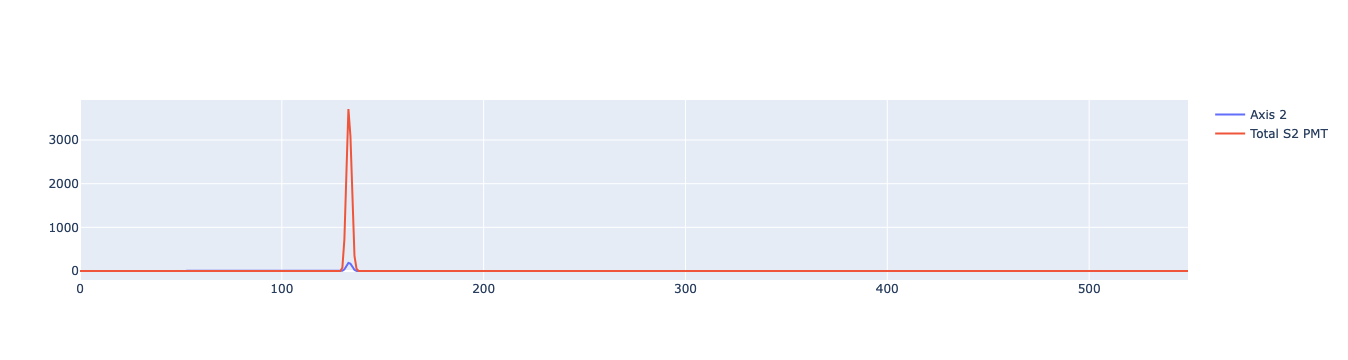

In [35]:
reduce_sipm = numpy.sum(batch['S2Si'][0],axis=(0,1))
    
x = reduce_sipm.shape[0]
    
fig = go.Figure(
    data=[
        go.Line(x=numpy.arange(x), y=reduce_sipm, name=f"Axis {label}"),
        go.Line(x=numpy.arange(550), y=full_pmt_waveform, name="Total S2 PMT")
    ]
)
fig.show()
    
    

As seen, the S2 signals overlap perfectly here though the vertical scale is totally arbitrary.